# Blackbody

A [blackbody](http://en.wikipedia.org/wiki/Black_body) or *planckian radiator* is an ideal thermal radiator that absorbs completely all incident radiation, whatever the wavelength, the direction of incidence or the polarization. <a name="back_reference_1"></a><a href="#reference_1">[1]</a>

A *blackbody* in [thermal equilibrium](http://en.wikipedia.org/wiki/Thermal_equilibrium) emits electromagnetic radiation called [blackbody radiation](http://en.wikipedia.org/wiki/Black-body_radiation).

## Planck's Law

The spectral radiance of a blackbody at thermodynamic temperature $T [K]$ in a medium having index of refraction $n$ is given by the [Planck's law](http://en.wikipedia.org/wiki/Planck%27s_law) equation: <a name="back_reference_2"></a><a href="#reference_2">[2]</a>

$$
\begin{equation}
L_{e\lambda}(\lambda,T)=\cfrac{C_1n^{-2}\lambda^{-5}}{\pi}{\Biggl[\exp\biggl(\cfrac{C_2}{n\lambda T}\biggr)-1\Biggr]^{-1}}
\end{equation}
$$
where
$$
\begin{equation}
\begin{aligned}
C_1&=2\pi hc^2\\
C_2&=\cfrac{hc}{k}
\end{aligned}
\end{equation}
$$

$h$ is Planck's constant, $c$ is the speed of light in vacuum, $k$ is the Boltzmann constant and $\lambda$ is the wavelength.

As per *CIE 015:2004 Colorimetry, 3rd Edition* recommendation $C_2$ value when used in colorimetry should be $C_2= 1,4388x10^{-2}mK$ as defined by the International Temperature Scale (ITS-90).

$C_1$ value is given by the Committee on Data for Science and Technology (CODATA) and should be $C_1=3,741771x10^{16}Wm^2$.

In the current *CIE 015:2004 Colorimetry, 3rd Edition* recommendation, colour temperature and correlated colour temperature are calculated with $n=1$.

[Colour](https://github.com/colour-science/colour/) implements various *blackbody* computation related objects in the `colour.colorimetry` sub-package:

In [1]:
import colour.colorimetry

> Note: `colour.colorimetry` package public API is also available from the `colour` namespace.

The *Planck's law* is called using either the `colour.planck_law` or `colour.blackbody_spectral_radiance` definitions, they are expecting the wavelength $\lambda$ to be given in nanometers and the temperature $T$ to be given in degree kelvin:

In [2]:
import colour

colour.colorimetry.planck_law(500 * 1e-9, 5500)

20472701909806.578

Generating the spectral distribution of a *blackbody* is done using the `colour.sd_blackbody` definition:

In [3]:
with colour.utilities.suppress_warnings(python_warnings=True):
    colour.sd_blackbody(6500, colour.SpectralShape(0, 10000, 10))

With its temperature lowering, the blackbody peak shifts to longer wavelengths while its intensity decreases:

In [4]:
from colour.plotting import *

In [5]:
colour_style();

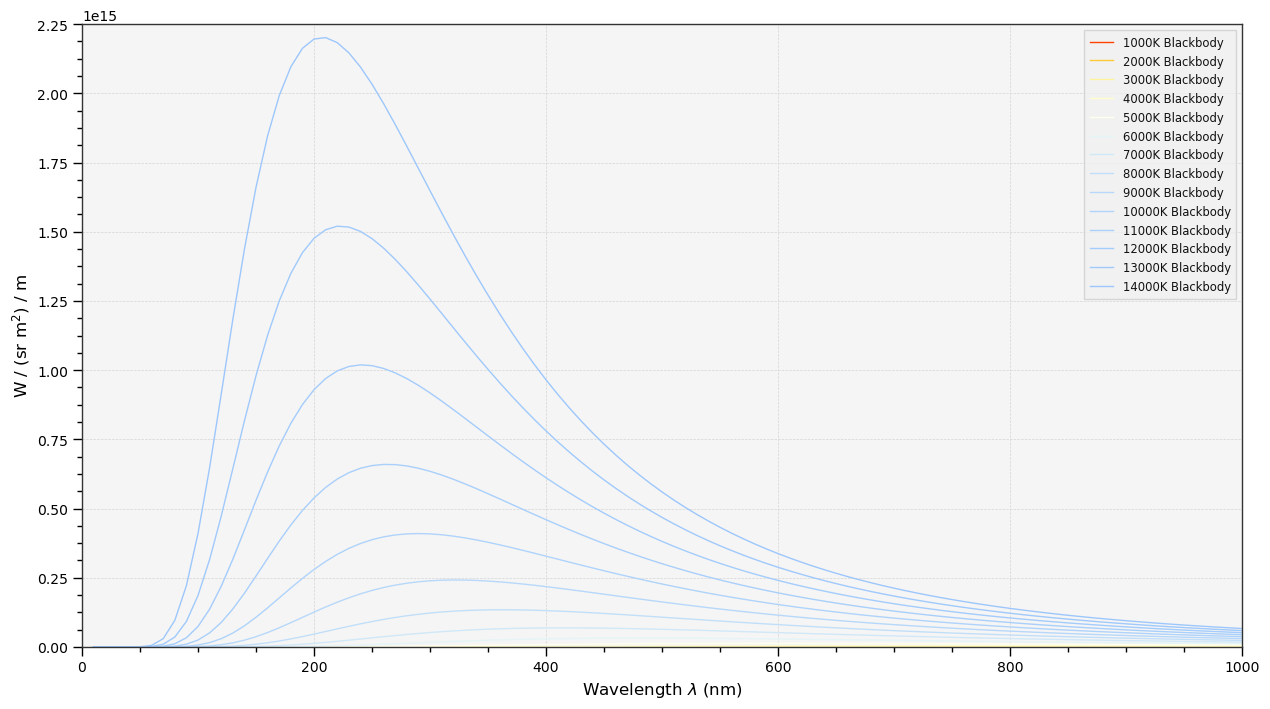

In [6]:
# Plotting various *blackbodies* spectral distributions.
blackbodies_sds = [colour.sd_blackbody(i, colour.SpectralShape(0, 10000, 10)) 
                   for i in range(1000, 15000, 1000)]
with colour.utilities.suppress_warnings(python_warnings=True):
    plot_multi_sds(blackbodies_sds,
                   y_label='W / (sr m$^2$) / m',
                   use_sds_colours=True,
                   normalise_sds_colours=True,
                   legend_location='upper right',
                   bounding_box=[0, 1000, 0, 2.25e15]);

Let's plot the blackbody colours from temperature in domain [150, 12500, 50]:

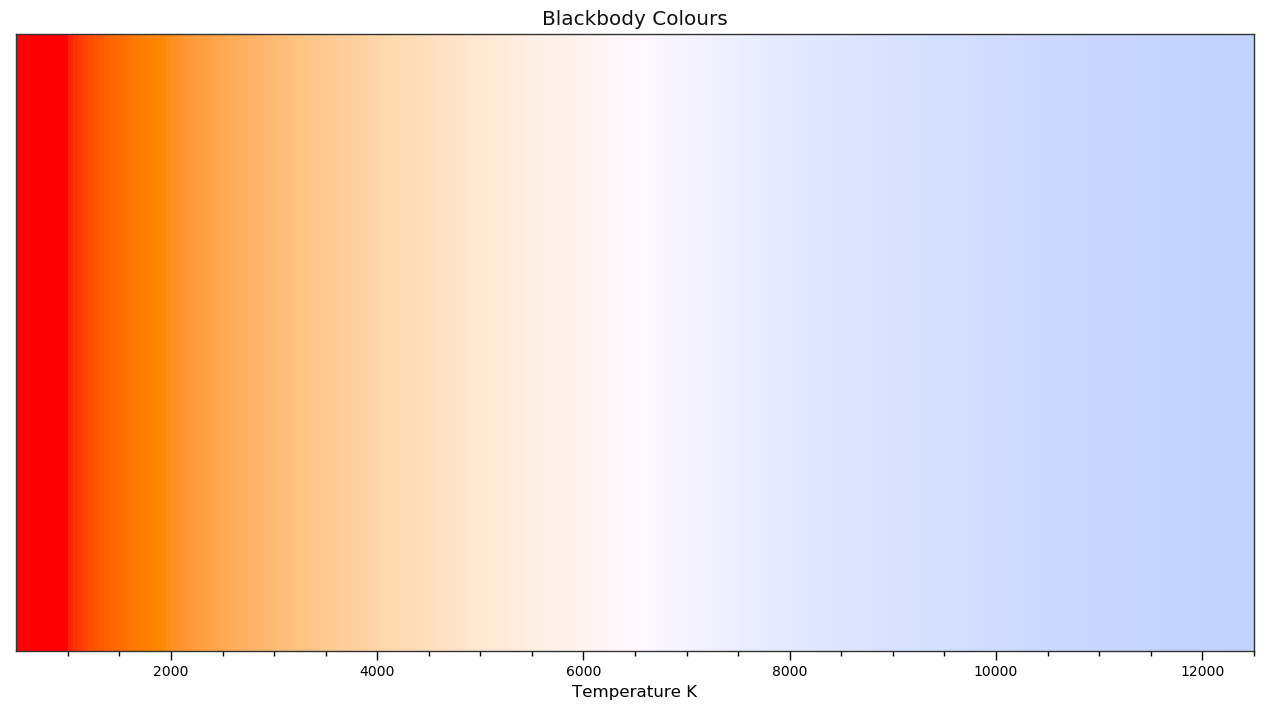

In [7]:
plot_blackbody_colours(colour.SpectralShape(500, 12500, 50));

## Stars Colour

Let's compare the extraterrestrial solar spectral irradiance to the blackbody spectral radiance of a thermal radiator with a temperature of 5778 K:

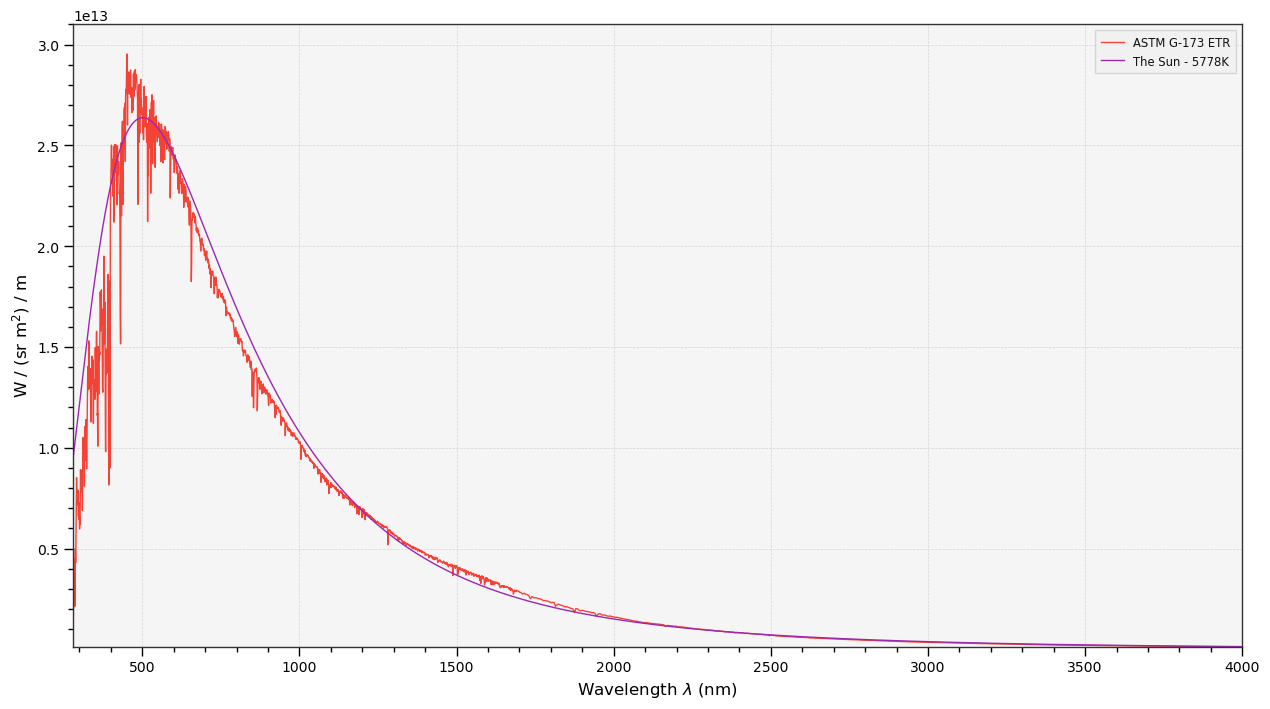

In [8]:
# Comparing theoretical and measured *Sun* spectral distributions.
# Arbitrary ASTM_G_173_ETR scaling factor calculated with
# :def:`colour.sd_to_XYZ` definition.
ASTM_G_173_sd = ASTM_G_173_ETR.copy() * 1.37905559e+13

blackbody_sd = colour.sd_blackbody(
    5778,
    ASTM_G_173_sd.shape)
blackbody_sd.name = 'The Sun - 5778K'

plot_multi_sds([ASTM_G_173_sd, blackbody_sd],
               y_label='W / (sr m$^2$) / m',
               legend_location='upper right');

As you can see the *Sun* spectral distribution is very close to the one from a blackbody at similar temperature $T$.

Calculating theoritical colour of any star is possible, for example the [VY Canis Majoris](http://en.wikipedia.org/wiki/VY_Canis_Majoris) red hypergiant in the constellation *Canis Major*.

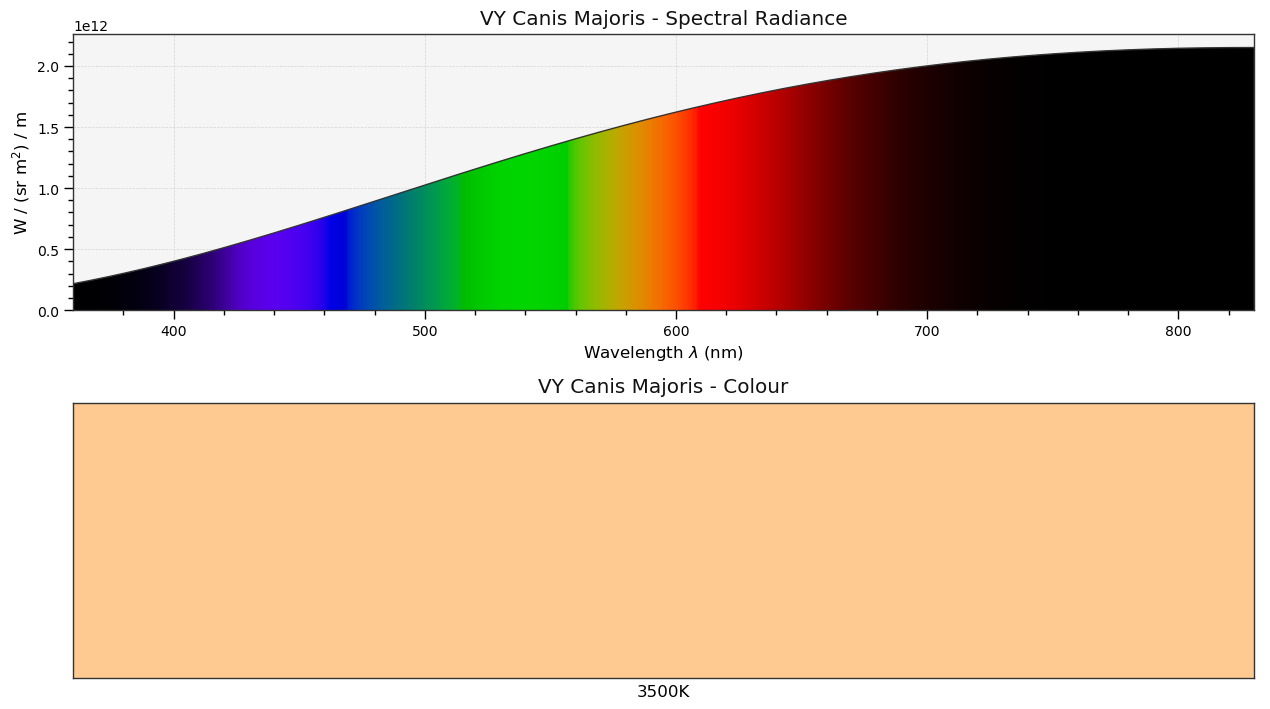

In [9]:
plot_blackbody_spectral_radiance(temperature=3500, blackbody='VY Canis Majoris');

Or [Rigel](http://en.wikipedia.org/wiki/Rigel) the brightest star in the constellation *Orion* and the seventh brightest star in the night sky.

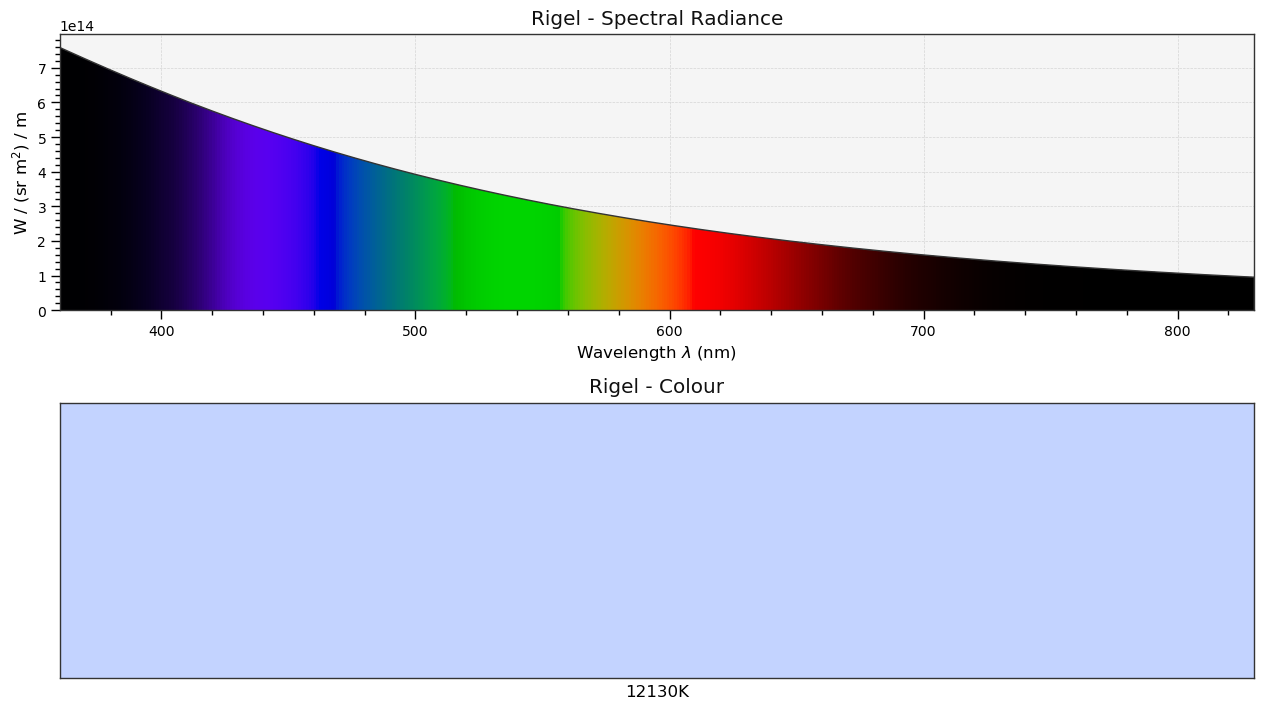

In [10]:
plot_blackbody_spectral_radiance(temperature=12130, blackbody='Rigel');

And finally the [Sun](http://en.wikipedia.org/wiki/Sun), our star:

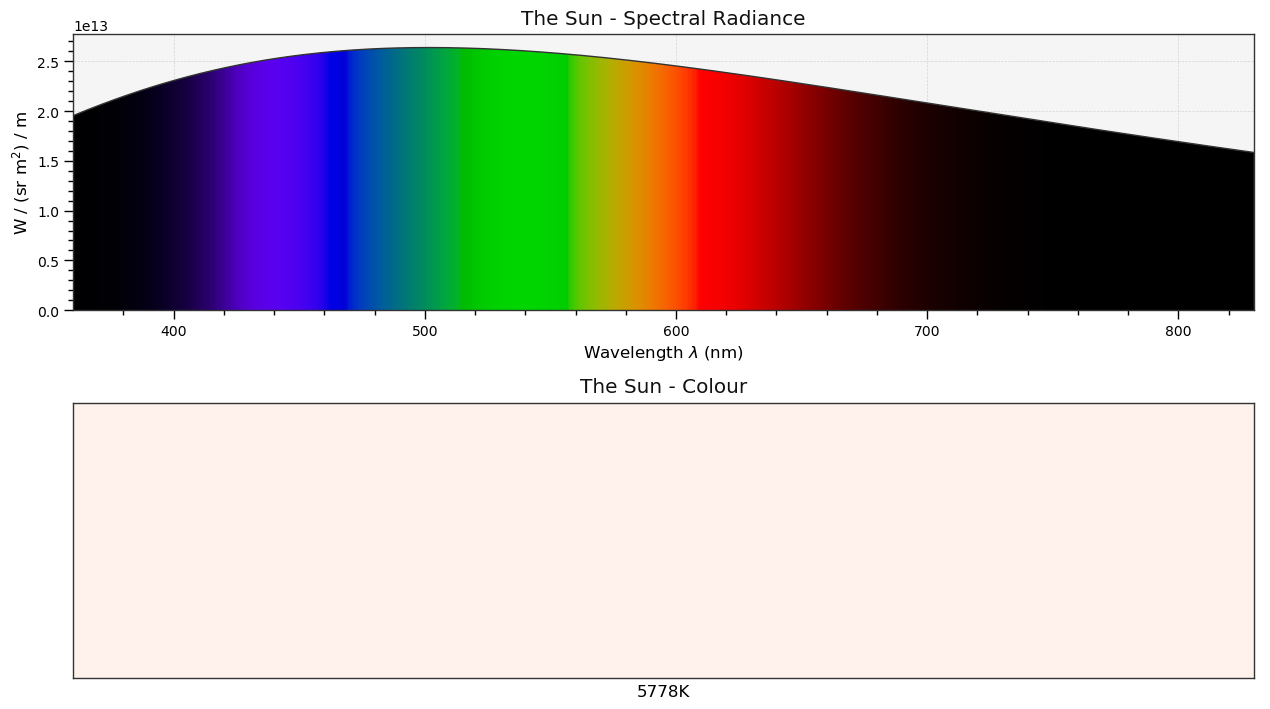

In [11]:
plot_blackbody_spectral_radiance(temperature=5778, blackbody='The Sun');

## Bibliography

1. <a href="#back_reference_1">^<a> <a name="reference_1"></a>CIE. (n.d.). 17-960 Planckian radiator. Retrieved June 26, 2014, from http://eilv.cie.co.at/term/960
2. <a href="#back_reference_2">^<a> <a name="reference_2"></a>CIE TC 1-48. (2004). APPENDIX E. INFORMATION ON THE USE OF PLANCK’S EQUATION FOR STANDARD AIR. In *CIE 015:2004 Colorimetry, 3rd Edition* (pp. 77–82). ISBN:978-3-901-90633-6